<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [31]:
# ANSWER
titanic_csv = '../../data/titanic_train.csv'
df = pd.read_csv(titanic_csv)

Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values. 

In [32]:
# ANSWER
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
df.shape

(891, 12)

In [34]:
df['Age'].fillna(df.groupby(by=['Sex'])['Age'].transform("mean"), inplace=True)

In [35]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# ANSWER
feature_cols = ['Pclass','Parch']
X = df[['Pclass','Parch']]
y = df[['Survived']]

In [37]:
y.value_counts()

Survived
0           549
1           342
dtype: int64

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [38]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [39]:
# ANSWER
# Create Model
log_reg = LogisticRegression(solver='liblinear', max_iter=10000)

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [40]:
# ANSWER
# Fit Model
log_reg.fit(X_train, y_train)

/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=10000, solver='liblinear')

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [41]:
# ANSWER
log_reg.coef_

array([[-0.84439049,  0.3412417 ]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [43]:
# ANSWER
log_reg.intercept_

array([1.23165951])

We can create tuples of the predictor names and coefficients like this:

In [44]:
# ANSWER
print(set(zip(feature_cols, log_reg.coef_[0])))

{('Parch', 0.3412416997316226), ('Pclass', -0.844390494073813)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [45]:
for col in zip(X_train.columns, log_reg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.844390
Parch       +0.341242


In [46]:
pd.DataFrame({'feature': feature_cols, 'coefficients': log_reg.coef_[0]})

,feature,coefficients
0,Pclass,-0.844390
1,Parch,0.341242


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [47]:
# ANSWER
print('accuracy = {:7.4f}' .format(log_reg.score(X_train, y_train)))

accuracy =  0.6901


In [48]:
print('accuracy = {:7.4f}' .format(log_reg.score(X_test, y_test)))

accuracy =  0.6682


What is the  `accuracy_score` for the test data?

In [49]:
# ANSWER
log_reg.score(X_test, y_test)

0.6681614349775785

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test, log_reg.predict(X_test))

0.6681614349775785

What can we say aout this result?

ANSWER
- ...
- ...

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [52]:
# ANSWER
# df['Age'].fillna(df.Age.mean(), inplace = True)
feature_cols = ['Pclass', 'Parch', 'Age']
X = df[feature_cols]
y = df[['Survived']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
# Build Model
log_reg = LogisticRegression()
# Fit Model
log_reg.fit(X_train, y_train)
# Score
log_reg.score(X_train, y_train)

/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6901197604790419

In [55]:
log_reg.score(X_test, y_test)

0.7443946188340808

So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

- ...
- ...
- ...

Let's see where the model is going wrong by showing the Confusion Matrix:

In [56]:
from sklearn.metrics import classification_report

In [57]:
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [58]:
# ANSWER
y_pred_class = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred_class))

[[116  18]
 [ 39  50]]


Nb. Here is how `confusion_matrix` arranges its output:

In [59]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [60]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       134
           1       0.74      0.56      0.64        89

    accuracy                           0.74       223
   macro avg       0.74      0.71      0.72       223
weighted avg       0.74      0.74      0.74       223



Which type of error is more prevalent?

ANSWER: ...

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [62]:
y_pred_class

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0])

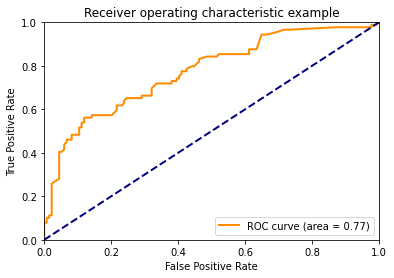

In [63]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = log_reg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [64]:
roc_auc

0.7730588629884286

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [65]:
df[['Sex', 'Embarked', 'Pclass']].head()

,Sex,Embarked,Pclass
0,male,S,3
1,female,C,1
2,female,S,3
3,female,S,1
4,male,S,3


In [66]:
titanic_with_dummies = pd.get_dummies(data = df, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first vriable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [67]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

In [68]:
titanic_with_dummies.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [69]:
# ANSWER
# Set Feature Both Numerical, Categorical
X = titanic_with_dummies[['Age','SibSp','Parch','Sex_male','Embarked_C','Embarked_Q','Pclass_1','Pclass_2']]
y = titanic_with_dummies[['Survived']]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [71]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.8098802395209581
0.7937219730941704


/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [72]:
# ANSWER
y_pred_class = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred_class))

[[111  17]
 [ 29  66]]


Nb. Here is how `confusion_matrix` arranges its output:

In [73]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [74]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       128
           1       0.80      0.69      0.74        95

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [76]:
log_reg.predict_proba(X_test)

array([[0.1783525 , 0.8216475 ],
       [0.91548275, 0.08451725],
       [0.12043445, 0.87956555],
       [0.35430501, 0.64569499],
       [0.07358848, 0.92641152],
       [0.87726921, 0.12273079],
       [0.77835944, 0.22164056],
       [0.15292848, 0.84707152],
       [0.48715812, 0.51284188],
       [0.44303098, 0.55696902],
       [0.89451978, 0.10548022],
       [0.41392613, 0.58607387],
       [0.77853035, 0.22146965],
       [0.75520225, 0.24479775],
       [0.35430501, 0.64569499],
       [0.53643372, 0.46356628],
       [0.92368311, 0.07631689],
       [0.92174724, 0.07825276],
       [0.9313655 , 0.0686345 ],
       [0.24558499, 0.75441501],
       [0.91959919, 0.08040081],
       [0.87901409, 0.12098591],
       [0.04221376, 0.95778624],
       [0.64168174, 0.35831826],
       [0.26180818, 0.73819182],
       [0.90231671, 0.09768329],
       [0.06756952, 0.93243048],
       [0.28497229, 0.71502771],
       [0.71596965, 0.28403035],
       [0.06669025, 0.93330975],
       [0.

Plot the ROC curve for the new model:

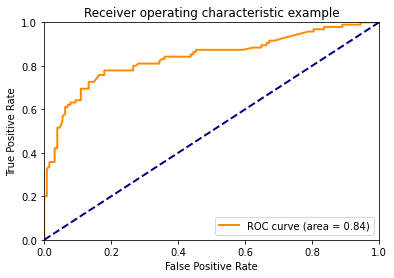

In [77]:
# ANSWER
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = log_reg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

Can we improve the model by including the remaining features?

In [78]:
# ANSWER
X = titanic_with_dummies[['Sex_male','Pclass_1','Pclass_3','Embarked_S','SibSp','Parch','Age']]
y = titanic_with_dummies[['Survived']]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [80]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.811377245508982
0.7982062780269058


/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
cross_val_score(log_reg, X_test, y_test, cv=5).mean()

/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

0.7628282828282827

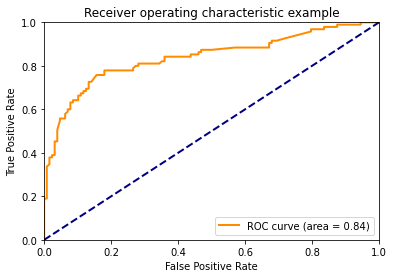

In [83]:
# ANSWER
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = log_reg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.

In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
titanic_with_dummies.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


In [86]:
titanic_with_dummies.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.736034,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783,0.242424,0.206510,0.551066
std,257.353842,0.486592,13.014897,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876,0.428790,0.405028,0.497665
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [88]:
X = titanic_with_dummies[['Age','SibSp','Parch','Fare',
                          'Sex_female','Sex_male',
                          'Embarked_C','Embarked_Q','Embarked_S',
                          'Pclass_1','Pclass_2','Pclass_3']]
y = titanic_with_dummies[['Survived']]

In [89]:
lasso_reg = Lasso(alpha=1)
coefs = []
errors = []
lasso_alpha = np.logspace(-6, 6, 200)
for a in lasso_alpha: 
    lasso_reg.fit(X, y)
    coefs.append(lasso_reg.coef_)
    errors.append(mean_squared_error(lasso_reg.coef_, lasso_reg.coef_))

In [90]:
optimal_lasso = LassoCV(alphas=lasso_alpha, cv=10)
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 0.0020729217795953697
Score: 0.3986603213771702


/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [91]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

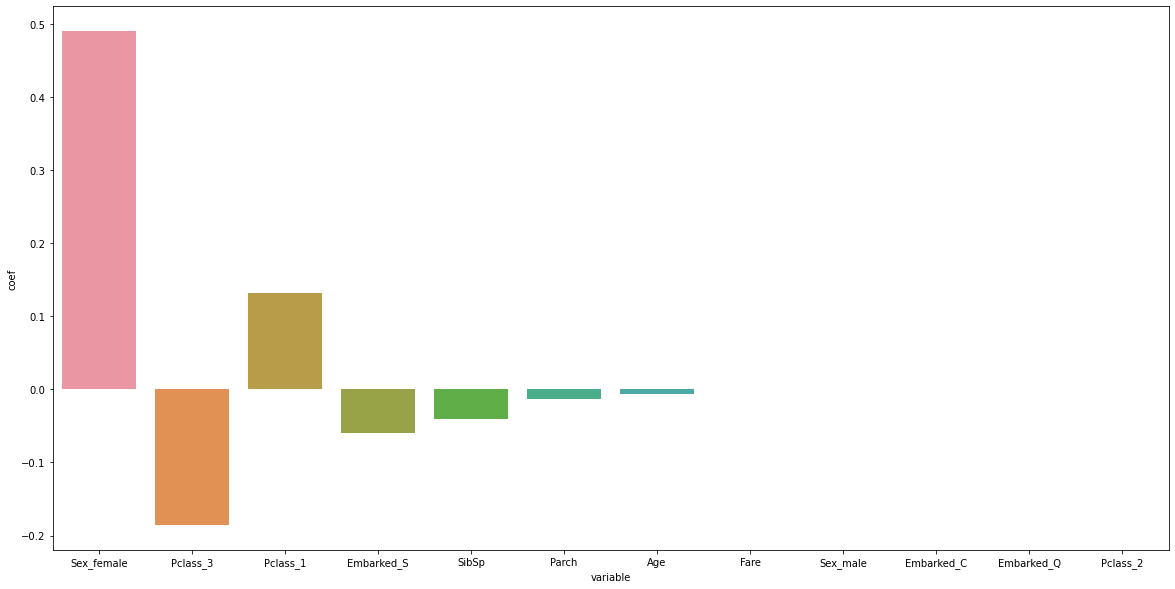

In [92]:
plt.figure(figsize=(20,10))
view_coeff(X, optimal_lasso)

In [93]:
['Sex_male','Pclass_1','Pclass_3','Embarked_S','SibSp','Parch','Age']

['Sex_male', 'Pclass_1', 'Pclass_3', 'Embarked_S', 'SibSp', 'Parch', 'Age']

In [94]:
model = LogisticRegression()

In [97]:
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))# ANSWER
y_pred_class = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred_class))



print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

print(classification_report(y_test, y_pred_class))
print(cross_val_score(model, X_train, y_train, cv=5).mean())

0.811377245508982
0.7982062780269058
[[113  15]
 [ 30  65]]
[['TN' 'FP']
 ['FN' 'TP']]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       128
           1       0.81      0.68      0.74        95

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223

0.8053641566603075


/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [98]:
# ANSWER
y_pred_class = model.predict(X_test)
print(confusion_matrix(y_test, y_pred_class))

[[113  15]
 [ 30  65]]


Nb. Here is how `confusion_matrix` arranges its output:

In [99]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       128
           1       0.81      0.68      0.74        95

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



In [101]:
TP = 66
TN = 111
FN = 29
FP = 17

In [102]:
accuracy = (TP+TN)/(TP + TN + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

In [103]:
print(accuracy_score(y_test, y_pred_class))

0.7982062780269058


In [104]:
classification_error = (FP + FN) / float((TP + TN + FN + FP))
classification_error

0.2062780269058296

In [105]:
# sensitivity
sensitivity = TP / float(FN + TP)
sensitivity


0.6947368421052632

In [ ]:
print(metrics.recall_score(y_test, y_pred_class))

In [106]:
# Sepcificity
specificity = TN / (TN + FP)
specificity

0.8671875

In [107]:
# False positive
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.1328125
0.1328125


In [109]:
# Precision
precision = TP / float(TP + FP)
print(precision)
# print(metrics.precision_score(y_test, y_pred_class))

0.7951807228915663




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



